In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Preparation of results for business: Newpaper Sales

We will illustrate how to prepare results for a business audience using ArviZ. The motivating example we'll use is a classic example in Industrial Engineering, the [newsvendor problem](https://en.wikipedia.org/wiki/Newsvendor_model). In brief the problem is as follows

As a newpaper girl, or boy, you face a dilemma; buy too many newspapers and you'll lose money from newspaper that expire. Buy too few newspapers and you'll miss potential sales, and lose money. Using past sales information and ArviZ we can create a compelling data centric pitch about what business choice to make in this scenario


## Outline
* 
* Posterior Estimation
* Posterior Predictive

### Simulation

As we have in past chapters we're going to create some simulated sales data. Our latent (hidden) parameter is 30 sales per a day on average, and we are simulated 20 days of sales. We are using the poisson distribution because we can only sell positive whole numbers of newspapers (e.g. 12, 14,21)

In [12]:
newpaper_sales = stats.poisson.rvs(30, size=20)

### The observed data
At the end of 20 days these are the sales numbers we see. Given 20 days of sales you must make a case of how many newspapers to buy in the future.

In [13]:
newpaper_sales

array([20, 33, 21, 32, 29, 35, 27, 35, 31, 33, 30, 33, 31, 25, 30, 29, 27,
       27, 32, 43])

## Fitting the data
Before any results can be prepared we must first fit a model and generate some results

In [32]:
with pm.Model() as newspaper_model:
    _lambda = pm.Normal("λ", newpaper_sales.mean(), 10)
    
    sales = pm.Poisson("sales", _lambda, observed=newpaper_sales)
    trace = pm.sample(draws=2000)
    ppc = pm.sample_posterior_predictive(trace)
    
data = az.from_pymc3(trace=trace, posterior_predictive=ppc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [λ]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:01<00:00, 6770.97draws/s]
The acceptance probability does not match the target. It is 0.8915617984522375, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 8000/8000 [00:01<00:00, 4186.30it/s]


## Preparation of results
Using ArviZ there are numerous ways we can share the results depending on audience
* Numerical Summary with az.summary
* Posterior parameter estimation using az.plot_posterior
* Posterior Predictive visualization using az.ppc_plot

### Numerical Summary of estimated parameters using az.summary
The simplest way to share the result is using the numerical summuraization in az.summary

In [33]:
az.summary(data)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
λ,30.236,1.226,27.879,32.471,0.021,0.015,3456.0,3451.0,3457.0,5431.0,1.0


Using the above summary we get a couple of useful data points. The mean of the expected number of sales each day is ~30.2 and the standard deviation of sales is ~1.2.
### Pros of Numerical Summary
* Ease of communication - There are only two data points to remember, this can easily be added to a slide or verbalized
* Normality Assumption - Nearly everyone has encountered the normal distribution and intuitively understands its parameterization

### Cons of Numerical Summary
* Normality Assumption - Not all distributions can be described well using normality assumptions
* No visualization - In presentations numbers can be forgetful. Depending
* Describes parameters, not results - In most business settings, the interest lies in the "reality" and not the parameters. For example in this newpaper model, the mean of 30 happens to describe the expected number of newspapers sold, but this is not always the case

### Visual Summary of estimated paramters using plot_posterior

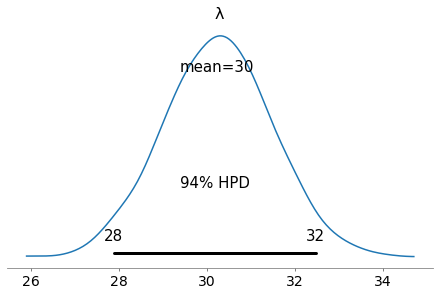

In [36]:
az.plot_posterior(data);

With plot posterior we get a nice visualization of the parameter estimates, as well as point estimate and the HPD

### Pros of Posterior Plot Summary
* Visually present - In a graphical presentatation format a graphic can stand out, particularly as a data expert who is able to generate something more than can be done in a spreadsheet.
* Visual display of uncertainty - The "confidence" of the prediction is present in a visual way, and doesn't require mental inference from a mean, sd parameter pair
* MultiModal Support - Not all parameter estimations can be parameterized with Gaussian parameters. Posterior Plots can correctly display the uncertainty of any type of parameter estimation

### Cons of  Posterior Plot Summary
* Hard to describe without the visual - In conversation a posterior plot cannot be succintly explained, especially to non Bayesians
* Describes parameters, not results - Same a numerical summary, this plot is in parameter space. In the plot non statisticians have a tedency to interpret the plot inccorectly as  "94% of days will have newspaper sales between 28 and 32" when in fact it means "The average sales per day will probably be between 28 and 32 newspaper per poisson parameterization" with the implication some days

### Visual Summary of estimated sales using Posterior Predictive Plot

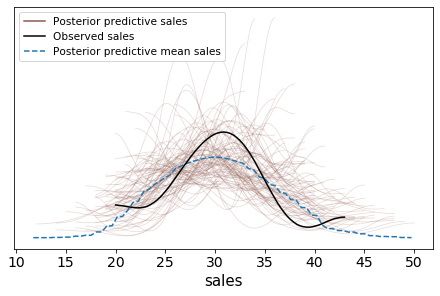

In [39]:
az.plot_ppc(data, num_pp_samples=100);

With plot_ppc we get a plot of the observed data along with the simulated outcomes from the paramter estimations

### Pros of Posterior Plot Summary
* In the context of business - Posterior Predictive estimations are in the units of the observed. In this case we are estimated the number of newspapers sold each day.
* Visually present - In a graphical presentatation format a graphic can stand out, particularly as a data expert who is able to generate something more than can be done in a spreadsheet.
* Visual display of uncertainty - The "confidence" of the prediction is present in a visual way, and doesn't require mental inference from a mean, sd parameter pair
* MultiModal Support - Not all parameter estimations can be parameterized with Gaussian parameters. Posterior Plots can correctly display the uncertainty of any type of parameter estimation

### Cons of Posterior Plot Summary
* Not straightforward to explain - Many non statisticians are unfamiliar with discriminative versus generative models and explaining the metholodogy isn't a quick answer